In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib as mp
from functools import reduce


In [2]:
#Import all csv files of VCF
files = glob.glob('G:\Dropbox (Vetsigian lab)\Vetsigian lab Team Folder\Ye\Genomics\M145 Evolved mutants\*.csv')

strain_names = list(map(lambda f: f.split('\\')[6].split('_')[0], files))
vcfs = dict()
for (strain, file) in zip(strain_names, files):
    vcf = pd.read_csv(file)
    vcf['Variant Frequency']= list(map(lambda x: float(x[0].replace('%', ''))/100, vcf['Variant Frequency'].str.split( '->')))
    vcf.sort_values(by = ['Variant Frequency'], ascending = False, inplace = True)
    vcfs[strain] = vcf
strain_names[:-1]

['R1',
 'R2',
 'R3',
 'R4',
 'R5',
 'RH1',
 'RH2',
 'RH5',
 'W1',
 'W2',
 'W3',
 'W4',
 'W5',
 'WS1',
 'WS2']

In [3]:
#Find all variance in mutants with 100% Variant Frquency 
def diff2ref_100_in_mutants(vcfs, strain_names):
    '''
    input: vcfs, dictionary of cleaned variant files of all mutants and WT compared to the ref genome;
           strain_names
    output: dictionary of variant files of mutants with 100% variant freq, the WT file is unchanged
    '''
    vcfs_new =  dict()
    for strain in strain_names:
        vcf = vcfs[strain]
        vcf['locus_tag'].fillna('intergenetic region', inplace = True)
        if strain != 'WT':
            vcfs_new[strain] = vcf[vcf['Variant Frequency'] == 1].set_index(['Minimum', 'Maximum', 'locus_tag'])
        else:
            vcfs_new[strain] = vcf.set_index(['Minimum', 'Maximum', 'locus_tag'])
    return vcfs_new


In [6]:
vcfs_new = diff2ref_100_in_mutants(vcfs, strain_names)
vcfs_new['WT']

,,,Name,Length,# Intervals,CDS Position,Change,Coverage,Polymorphism Type,Protein Effect,Variant Frequency,Variant P-Value (approximate),Amino Acid Change,Codon Change,Sequence,gene,note
Minimum,Maximum,locus_tag,,,,,,,,,,,,,,,
104233,104233,SCO0124,G,1,1,606.0,A -> G,34,SNP (transition),None,1.000,1.000000e-102,NaN,GAA -> GAG,A,NaN,"SCJ21.05, unknown, len: 453 aa; similar in par..."
7118314,7118314,SCO6436,C,1,1,61.0,G -> C,20,SNP (transversion),Substitution,1.000,1.000000e-62,V -> L,GTG -> CTG,G,NaN,"SC9B5.03, probable tRNA synthetase, len: 506 a..."
5633841,5633841,SCO5182,G,1,1,19.0,C -> G,20,SNP (transversion),Substitution,1.000,1.000000e-54,R -> G,CGC -> GGC,C,NaN,"2SC3B6.06, conserved hypothetical protein, len..."
5643986,5643986,SCO5186,NaN,1,1,601.0,(G)3 -> (G)2,47,Deletion (tandem repeat),Frame Shift,1.000,3.200000e-71,NaN,NaN,G,NaN,"2SC3B6.10, conserved hypothetical protein, len..."
5753681,5753681,intergenetic region,NaN,1,1,NaN,-C,42,Deletion,NaN,1.000,2.500000e-97,NaN,NaN,C,NaN,NaN
603360,603360,intergenetic region,G,1,1,NaN,A -> G,37,SNP (transition),NaN,1.000,6.300000e-97,NaN,NaN,A,NaN,NaN
6370281,6370280,intergenetic region,G,0,1,NaN,+G,58,Insertion,NaN,1.000,1.000000e-145,NaN,NaN,-,NaN,NaN
6822638,6822638,SCO6207,T,1,1,176.0,C -> T,34,SNP (transition),Substitution,1.000,2.500000e-99,S -> F,TCC -> TTC,C,NaN,"SC2G5.28, unknown, len: 84aa"
7044234,7044234,SCO6381,G,1,1,834.0,A -> G,42,SNP (transition),None,1.000,6.300000e-131,NaN,GGT -> GGC,A,NaN,"SC4A2.17c, probable lipoprotein, len: 447 aa; ..."


In [7]:
# Find all 100% appeared variance, pick up the 'Minimum', 'Maximum' locus and 'locus_tag' as the mark for the variance
def find_diff_100(vcfs_new, strain_names):
    '''
    input: cleaned vcfs and strain names
    output: diff, all nonredundant diff in all mutants;
    '''
    df = vcfs_new[strain_names[0]]
    for strain in strain_names[0:-1]:
        df = df.append(vcfs_new[strain])
    return list(set(df.index.values))

In [8]:
diff = find_diff_100(vcfs_new, strain_names)
diff

[(1644238, 1644238, 'SCO1536'),
 (7203532, 7203532, 'SCO6512'),
 (3368076, 3368077, 'SCO3074'),
 (5044225, 5044225, 'SCO4620'),
 (5443132, 5443131, 'intergenetic region'),
 (7118314, 7118314, 'SCO6436'),
 (4726818, 4726818, 'SCO4315'),
 (1740776, 1740776, 'SCO1626'),
 (3680393, 3680393, 'intergenetic region'),
 (2855967, 2855966, 'SCO2628'),
 (4248772, 4248772, 'intergenetic region'),
 (6769937, 6769937, 'SCO6167'),
 (5643986, 5643986, 'SCO5186'),
 (4257062, 4257061, 'SCO3869'),
 (1246835, 1246835, 'SCO1182'),
 (1622503, 1622503, 'SCO1516'),
 (4397372, 4397372, 'SCO4003'),
 (5914629, 5914628, 'SCO5440'),
 (7146838, 7146838, 'SCO6458'),
 (1634749, 1634749, 'SCO1529'),
 (6890540, 6890540, 'SCO6265'),
 (4257072, 4257074, 'SCO3869'),
 (2158342, 2158342, 'SCO2015'),
 (1649515, 1649515, 'intergenetic region'),
 (5762045, 5762044, 'intergenetic region'),
 (8044092, 8044092, 'SCO7236'),
 (3246681, 3246680, 'intergenetic region'),
 (7044234, 7044234, 'SCO6381'),
 (5644124, 5644123, 'SCO5186'),


In [10]:
variance_table = pd.DataFrame(index = diff, columns = strain_names)
for strain in strain_names:
    strain_inds = vcfs_new[strain].index.values
    if strain != 'WT':
        for ind in strain_inds:
            if ind in diff:
                variance_table.iloc[diff.index(ind)][strain] = 1            
    else:
        for ind in strain_inds:
            if ind in diff:
                #variance_table['WT Variance Frequency'] = round(vcfs_new[strain].loc[ind]['Variant Frequency'], 2)
                variance_table.iloc[diff.index(ind)][strain] = 1        
variance_table['WT VF'] = np.nan
WT = vcfs_new['WT']
WT_inds = WT.index.values
WT_inds[0]
for ind in WT_inds:
    for id in diff:
        if ind == id:
            vf = WT.loc[ind, 'Variant Frequency']
            variance_table.loc[id, 'WT VF'] = vf
variance_table = variance_table.fillna(0).sort_values(by = 'WT VF', ascending = False)
variance_table

,R1,R2,R3,R4,R5,RH1,RH2,RH5,W1,W2,W3,W4,W5,WS1,WS2,WT,WT VF
"(1644238, 1644238, SCO1536)",1,1,NaN,NaN,1,NaN,1,NaN,1,1,NaN,1,1,NaN,1,1,NaN
"(7203532, 7203532, SCO6512)",NaN,1,1,1,NaN,NaN,1,NaN,1,NaN,1,NaN,1,1,1,1,NaN
"(3368076, 3368077, SCO3074)",NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(5044225, 5044225, SCO4620)",NaN,NaN,NaN,1,NaN,1,1,NaN,1,NaN,1,1,NaN,NaN,1,1,NaN
"(5443132, 5443131, intergenetic region)",NaN,NaN,NaN,NaN,1,1,NaN,1,1,NaN,1,NaN,1,NaN,NaN,1,NaN
"(7118314, 7118314, SCO6436)",1,1,NaN,NaN,1,1,1,1,NaN,NaN,1,1,1,NaN,1,1,NaN
"(4726818, 4726818, SCO4315)",1,NaN,NaN,1,NaN,1,NaN,1,1,1,1,NaN,NaN,NaN,1,NaN,NaN
"(1740776, 1740776, SCO1626)",NaN,1,NaN,NaN,NaN,NaN,1,1,NaN,NaN,1,NaN,NaN,NaN,1,1,NaN
"(3680393, 3680393, intergenetic region)",1,1,NaN,1,1,NaN,NaN,NaN,NaN,1,1,NaN,NaN,1,NaN,1,NaN
"(2855967, 2855966, SCO2628)",NaN,1,NaN,1,1,NaN,1,NaN,1,1,NaN,1,1,1,NaN,1,NaN


In [38]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [33]:
def venn_WT_Mutant(variance_table, mutant_name):
    comp_table = variance_table[[mutant_name, 'WT']]
    strain_num = comp_table.aggregate('sum')
    common_diff_num = sum(comp_table.sum(axis = 1) == 2)
    venn2(subsets = (strain_num[mutant_name], strain_num['WT'], common_diff_num), set_labels = (mutant_name, 'WT'))
    plt.show()

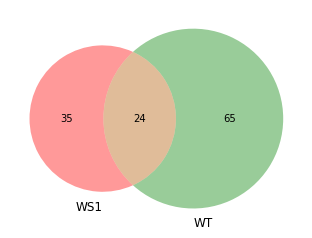

In [39]:
venn_WT_Mutant(variance_table, 'WS1')